In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [3]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

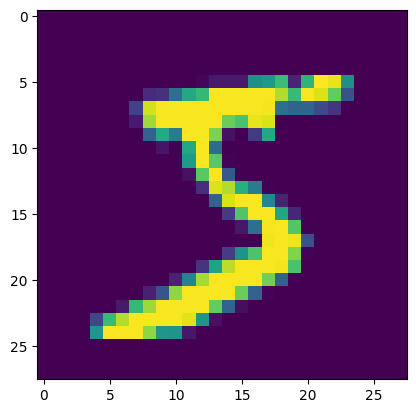

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
# values between 0 & 1
X_train = X_train/255
X_test = X_test/255

Building the ANN Model

In [8]:
model = Sequential()

#Add model layers
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128 , activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10 , activation='softmax'))

c:\Users\rojas\OneDrive\Desktop\DEEP LEARNING\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(X_train , y_train , epochs=25 , validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8422 - loss: 0.5223 - val_accuracy: 0.9523 - val_loss: 0.1643
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9610 - loss: 0.1300 - val_accuracy: 0.9631 - val_loss: 0.1284
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9738 - loss: 0.0850 - val_accuracy: 0.9705 - val_loss: 0.1032
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9799 - loss: 0.0644 - val_accuracy: 0.9715 - val_loss: 0.0975
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9685 - val_loss: 0.1114
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9704 - val_loss: 0.1083
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9737 - val_loss: 0.0942
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0231 - 

In [13]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [14]:
y_pred = y_pred.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9717

Plotting the graphs :

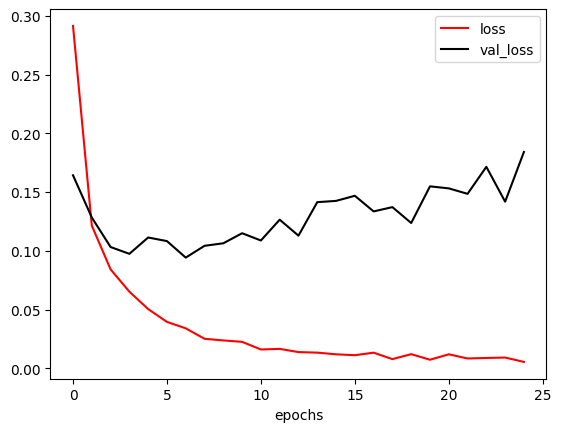

In [29]:
plt.plot(history.history['loss'] , color='red' , label='loss')
plt.plot(history.history['val_loss'] , color='black' , label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

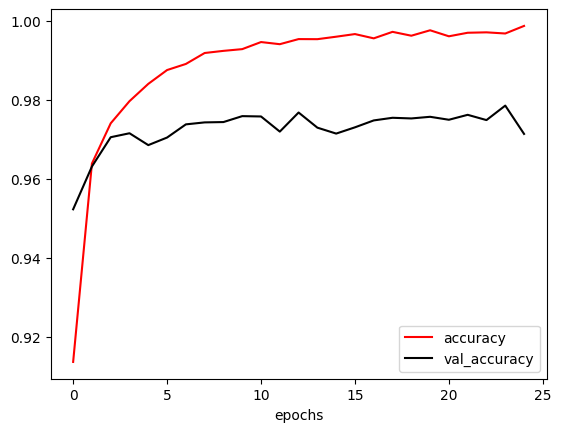

In [30]:
plt.plot(history.history['accuracy'] , color='red' , label='accuracy')
plt.plot(history.history['val_accuracy'] , color='black' ,label='val_accuracy' )
plt.xlabel('epochs')
plt.legend()
plt.show()

Testing the model :

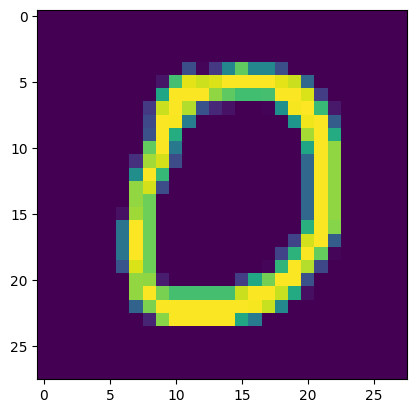

In [23]:
plt.imshow(X_test[10])

In [24]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([0], dtype=int64)

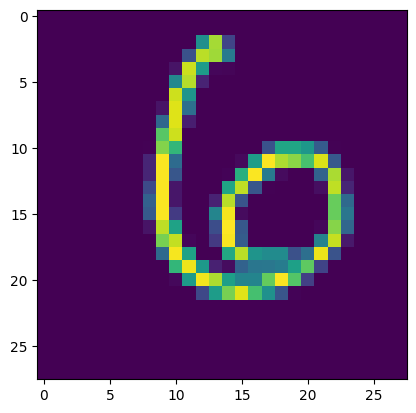

In [25]:
plt.imshow(X_test[100])

In [26]:
model.predict(X_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([6], dtype=int64)